# Titanic - Remember Hoe to Datascience  
This project utilizes the Titanic dataset, Kaggle, to predict passenger suvivorship during the Titanic tragedy. Along the way I will ideally remember how to datascience and build good documentation habits. 


In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the data
train_data_path = 'data/train.csv'
test_data_path = 'data/test.csv'

training = pd.read_csv(train_data_path)
testing = pd.read_csv(test_data_path)

### Exploratory Data Analysis


In [4]:
#look at data type and null counts
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


.info() prints a summary of the dataframe including information about the DataFrame.  
- Class: class type of the DataFrame
- RangeIndex: the number of entries, the range of the index
- Columns: list of the columns in the df, their types, and number of non-null values
- #: index of the column
- Dtype: the data type of the column, note: object is for strings (or mixed) types
- Dtype Summary: how many columns there are of each data type  

### Descriptive Statistics

In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#give the count of unique values of the column
training['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
#give the relative frequencies of the unique values
training['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
training['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
training['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

**.describe()**  
Prints the decriptive statistics for numeric and object series excluding NaN values. For numeric values the index will include: count, mean, std, min, max, percentiles (default 25, 50, 75; 50 = median).
- Count: count excluding NaN
- Mean: average
- Std: standard deviation, a measure of how disperesed the data is in relation to the mean, square root of the variance
- Min: minimum value/lowest
- Max: maximum value/highest
- Percentiles: the value indicates that the percentile % of the data points are less than or equal to the given value. i.e. the bottom 25% of the data falls between the minimum value and the value printed. Gives a concise summary of the distribution and central tendency (a single value that attempts to describe a set of data by identifying the middle of its distribution) of the data.  

---

**PassengerID**  
There are no null values in this cloumn. Not useful since it is an arbitrary index given to the data.  

**Survived**  
Values 1,0 1= survived 0=died  
There are no null values in this column. Even with only two possible values we can still get a good idea about the group just from the descriptive stats. For this column the mean and the standard deviation give us a good idea of the proportion of survival. If it was 50/50 we would epect the mean to be .5. Because the mean is 0.38 we know there are more dead because there are more 0s pulling the average down.  
The standard deviation also gives an idea of the balance. If the values were 50/50 the std would be .5. If there were all 1s or all 0s the std would 0. Because the std is 0.48 we know there is more of one value than another but its not much lower so its not obnoxious. The percentiles for this column tell the same story. The median is 0, indicating there are more deaths than not, and the proportion falls somewhere between 50% and 75% because that is where the values shift from 0 to 1.  
We can calculate the actual percent and counts.  

**Pclass**  
1, 2, 3 meaning 1st class, 2nd class, and 3rd class as a proxy for socioeconomic standing. There are no null values.  
In this column, with 3 unique values, if they were evenly distributed the standard deviation would be 0.8165.  
Standard deviation note: you can calculate *Coefficient of Variance* which is the percentage of the mean. This will give some idea of whether a std is high or low for the specific dataset. In this example the CV is 36.21%. The typical range of high or low is still dependent on industry context, but greater than 30% is generally considered high. Ergo we are seeing a large distribution of values in this dataset.  
The mean, 2.31 and percentiles inidcate an assymetric distrubution specifically left skewed. Passengers were primarily 3rd class. 
Just by looking at the percentiles we know more than 50% of the passengers are 3rd class.  

**Age**  
There are 177 null values. For the 714 we have data for, they are on average 29.70. Based on the pecentiles the distribution is relatively normal, evenly distributed.  

**SibSp and Parch**  
The mean for both these categories is relatively low, 0.52 and 0.38 respectively, indicating people were traveling in small units. There were not many large families on board. The sibsp only counted husband, wife or brother, sister, stepsibling so some additional minutae is lost for fiances, mistresses, or other romantic partners.  

Predominantly passengers were unmarried people aged 20-38. 

**Fare**  
There is a wide distrubtion of fare prices paid. On average the fare was 32.20 (British Pound most likely but this is not specified on Kaggle). There is high variability in the fares based on the high standard deviation and the large spread of the percentiles. It is interesting to note that some are recorded as 0 in the dataset. (Maybe its just babies but I was hoping to find a way to distinguish the crew from the passengers in this data set.)  

---

In [10]:
training.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Normally, with a mixed df it would default to only doing the numeric cloumns. You can change the include parameter to adjust.
For object data (strings, timestamps) the index would have count, unique, top, freq. Timestamps also have first and last.
- Top: most common value, arbitraily chosen from among those with the highest count if there are multiple
- Freq: the most common values frequency
- Unique: number of unique values  

---

**Name**  
The frequency of 1 indicates that no one has the same name, boring.  

**Sex**  
The values are saved as strings. I would prefer the values to be saved as arbitrary 0, 1 so we could get descriptive stats instead, but from the frequency the passengers were predominantly male.  

**Ticket and Cabin**  
These columns are strings. There ay be some insight to pull from these values later but there is nothing interesting indicated from the raw top and freq.  

**Embarked**  
Only 2 null values. The 3 destinations to embark from C = Cherbourg, Q = Queenstown, S = Southampton. Most passengers are marked as embarking from Sothhampton. 

### Thoughts and Notes  
- I would like to be able to distinguish crew from other passengers in the data. Maybe there is a way to based on ticket or fare paid, or need to research the kaggle dataset more to determine if the crew was excluded. Are all passengers accounted for in this dataset?  
- I'd prefer the gender to be 0,1 instead of strings **TODO**  
- Interesting things to pull out to look at in no particular order: 
  - titles in names
  - cabin indicating location on the ship
  - fare being related to crew, or being related to babies
  - embark location having any relation to class, cabin, survival  
  - family ties having any relation to survival
  - associations with gender, class, and age with survival
  - is there anything interesting about which passengers have null values in certain columns. Age is the only numeric column with nulls. **TODO** take that into account when deciding what to do with these values. It may not be apropriate to slap an average on them as it may skew the data. They could be babies who presumably were more likely to die. 

In [ ]:
#because .describe() defaults to numeric, 
# this is a quick way to pull out columns with numeric values
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
#distinguish numeric vs categorical
df_num_cols = ['Age', 'SibSp', 'Parch','Fare']
df_num = training[df_num_cols]

df_cat_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df_cat = training[df_cat_cols]

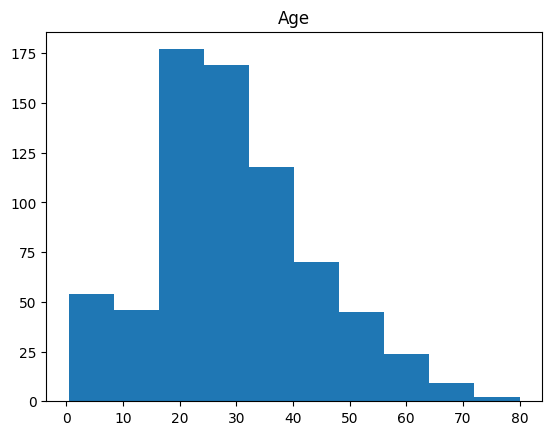

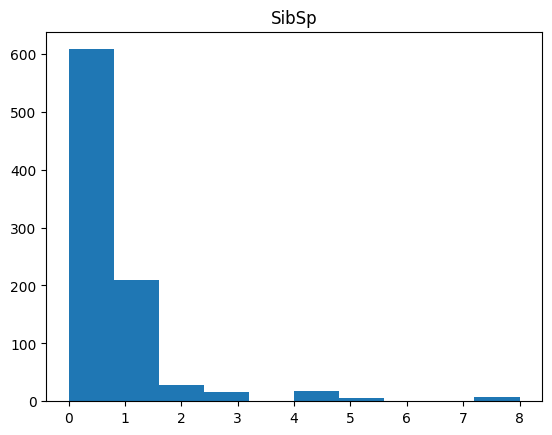

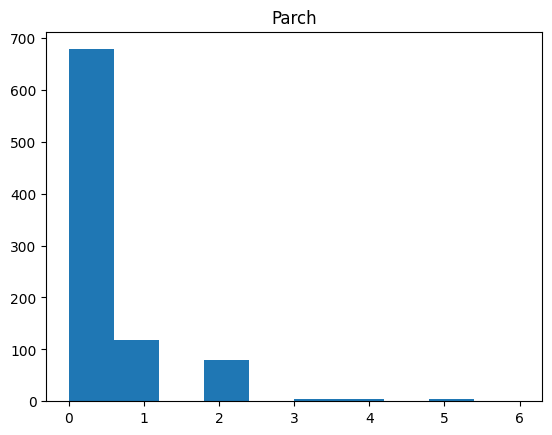

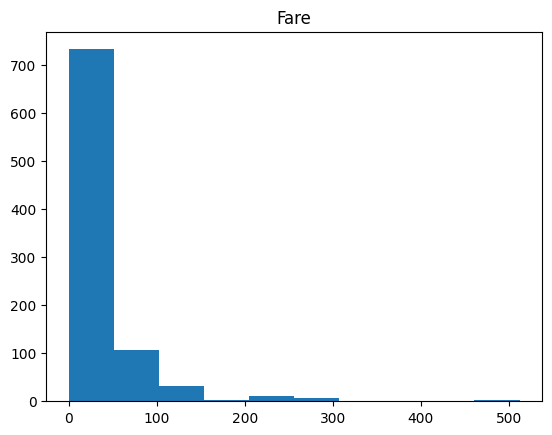

In [23]:
#distributions for the numeric columns
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

### Normalize  
You should normalize skewed data when:  
1. The model you're training assumes a normal distribution
  - Linear/Logisitc Regression, Prinicpal Component Analysis, t-test/ANOVA, etc
    - We will definitely be trying out a regression so we will want to normalize some of these, BUT the skew may be meaningful for our outcome
  - Distance based models: K-Nearest Neighbors, Support Vector Machine, etc
2. Reduce the influence of outliers
  - very applicable to our dataset

You should NOT normalize when:  
1. The model doesn't care
2. The skew carries meaningful information (income distribution)
3. The original scale is important to the interpretibility

---
### Correlation  
Check for correlation between features as part of the EDA/preprocessing. Highly correlated features can be redundant. Linear models like linear/logisitc regression assume features are **independent**. 

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

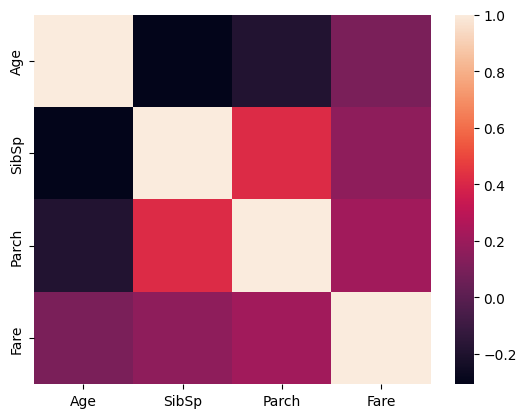

In [24]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [16]:
#list the correlation values, descending

#get correlation matrix and unstack to get pairs
corr_matrix = df_num.corr()
corr_pairs = corr_matrix.unstack()
#drop self correlations (variable correlating with itself = 1)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
#drop duplicate pairs
corr_pairs = corr_pairs.drop_duplicates()
#sort by descending
sorted_corr = corr_pairs.sort_values(ascending=False)

print(sorted_corr)

SibSp  Parch    0.414838
Parch  Fare     0.216225
SibSp  Fare     0.159651
Age    Fare     0.096067
       Parch   -0.189119
       SibSp   -0.308247
dtype: float64


Our numerical values are not highly correlated with eachother. 0.41 is moderate.

In [25]:
#correlation with survival across age, sibsp, parch, and fare
#shows the mean of the column across each group
pd.pivot_table(training, index = 'Survived', values = df_num_cols)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


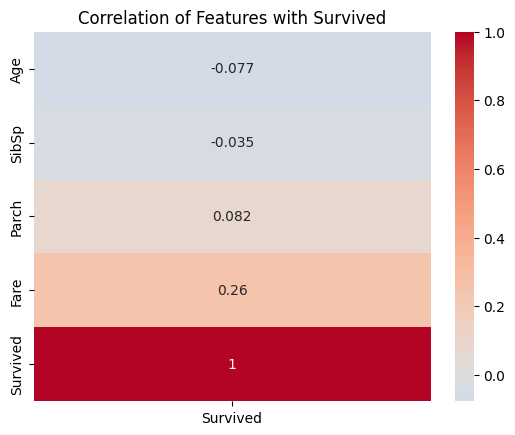

In [ ]:
#add in survival
df_num_survive = training[['Age', 'SibSp', 'Parch','Fare', 'Survived']]

# Compute the correlation matrix
num_survive_corr = df_num_survive.corr()

# Focus on correlation with 'Survived'
survived_corr = num_survive_corr[['Survived']]
#plt.figure(figsize=(6, len(survived_corr)*0.5))  # Adjust height to fit features

sns.heatmap(survived_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation of Features with Survived')
plt.show()


**Correlation with Normalization**  
From earlier exploration we found that SibSp, Parch, and Fare are skewed rigth due to outliers. 
Normalize options:  
- Log Transform
  - Uses log(x) or log1p(x)
  - Compress the outliers, higher values are puleld closer to center
  - Flatten right-skewed data
  - may distort smaller values
  - changes the shape to be more Gaussian
  - normalize for linear models and visualization
- Robust Scaler
  - Uses median and IQR
  - Does not change the shape of the distribution, just rescales so outliers have less influence
  - Normalize magnitudes without changing the distirbution
I've chosen to nroamlize them with Log Transform. It compresses the high values which is useful for right skewed data. It may distort the small data. Robust Scaling is also recommended but is noted as being good for ignoring the outliers as opposed to compressing them.

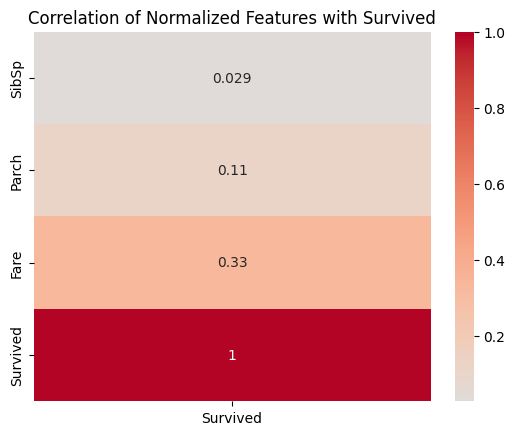

In [32]:
#Normalize SibSp, Parch, and Fare since they were skewed right
#log1p(x) because of the zeros, more precise for small values

cols_to_log = ['SibSp', 'Parch','Fare']
log_df = training[cols_to_log].apply(np.log1p)

log_survive_df = log_df.assign(Survived=training['Survived']) #assign because index is preserved

log_survive_corr = log_survive_df.corr()

# Focus on correlation with 'Survived'
log_survive_corr = log_survive_corr[['Survived']]
#plt.figure(figsize=(6, len(survived_corr)*0.5))  # Adjust height to fit features

sns.heatmap(log_survive_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation of Normalized Features with Survived')
plt.show()


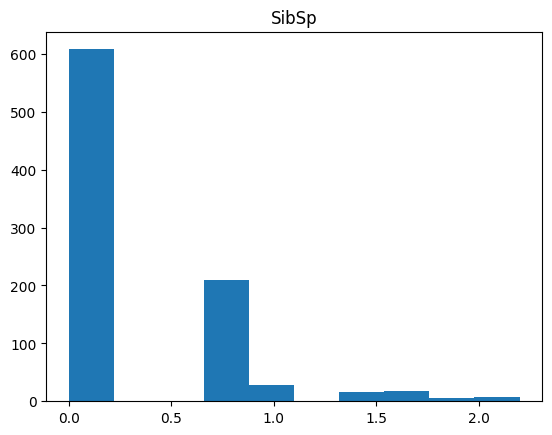

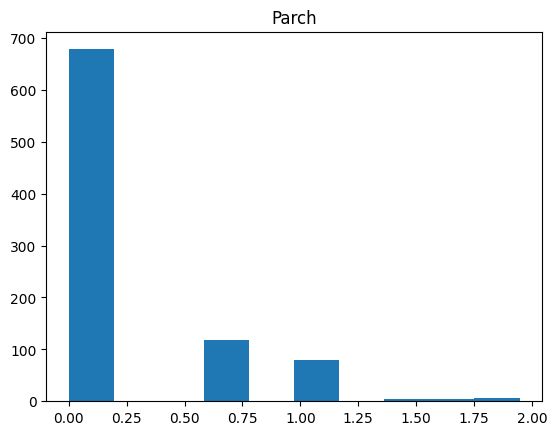

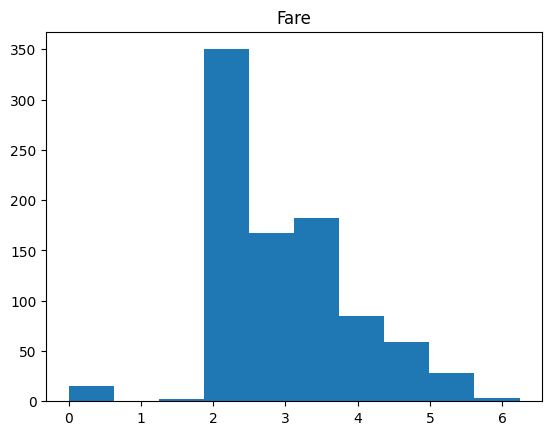

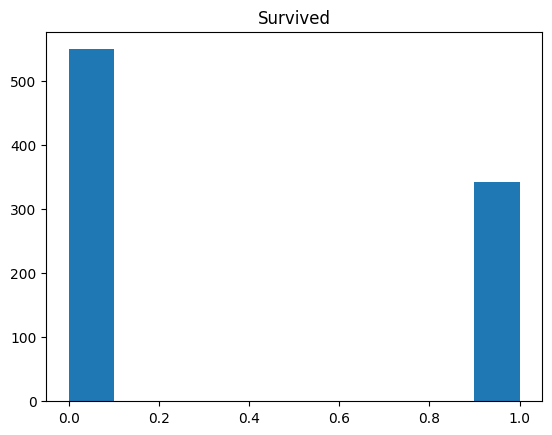

In [33]:
#distributions for the normalized numeric columns
for i in log_survive_df.columns:
    plt.hist(log_survive_df[i])
    plt.title(i)
    plt.show()

**Normalization and Numerical Correlation Notes**  
For the numerical values there's not any high correlation between the features, so we can assume they're independent.  
SibSp and Parch, because of the predominant 0s, were not prticularly impacted. Fare, however, does become normalized after applying the log transform.  
Looking at the correlation after normalization, we see similar correlation values. SibSp and Parch does not have any independent effect on the survivorship. Fare, before and after normalization, had minor correlation on survivorship. If we're looking to narrow down features, normalized fare should be included in training.  

In [42]:
# Comparing survival and each of these categorical variables 
for i in ['Pclass', 'Sex', 'Embarked']:
    print(pd.pivot_table(training, index = 'Survived', columns = i, values = 'PassengerId' ,aggfunc ='count'))
    print()


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [47]:
for i in ['Pclass', 'Sex', 'Embarked']:
    pivot = pd.pivot_table(training, index = 'Survived', columns = i, values = 'PassengerId' ,aggfunc ='count')
    print(pivot)
    print()
    #divide each row by the sum
    #numerator.div(denomenator, for each row)
    print(pivot.div(pivot.sum(axis=1), axis=0))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Pclass           1         2         3
Survived                              
0         0.145719  0.176685  0.677596
1         0.397661  0.254386  0.347953

Sex       female  male
Survived              
0             81   468
1            233   109

Sex         female      male
Survived                    
0         0.147541  0.852459
1         0.681287  0.318713

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Embarked         C         Q         S
Survived                              
0         0.136612  0.085610  0.777778
1         0.273529  0.088235  0.638235



The above pivot tables show the percent per group within survived/died.
i.e. Pclass: Of the passengers who died 15% were 1st class, 18% were 2nd class, and 68% were 3rd class. Of the passengers who lived 40% were 1st class, 25% were 2nd class, and 34% 3rd class. 

In the group who died there is a higher representation of 3rd class passengers, males, and passengers embarking from Southhampton.
However, this is skewed by the larger number of pasengers in each of those groups. 

In [55]:
#Survival rate within each group
for i in ['Pclass', 'Sex', 'Embarked']:
    confusion = pd.crosstab(training[i], training['Survived'])
    print(confusion)
    print()
    confusion = pd.crosstab(training[i], training['Survived'], normalize='index')
    print(confusion)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
Survived    0    1
Sex               
female     81  233
male      468  109

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


The above matrices show the rate within each group. 
i.e. Pclass: Of the 3rd class passengers, 76% died and 24% lived compared to 1st class passengers where only 37% died and 63% lived. Being a 3rd class passenger meant a high chance of dying. 

**Crosstab vs Pivot Table**  
Crosstab:
- Categorical vs categorical
- Frequency tables / confusion matrices
- Quick summaries with counts

Pivot Table:
- Numeric summaries grouped by one or more columns
-Choose aggregation function (mean, sum, count, std, etc)
- More complex group-by like tasks